# Matplotlib
Pandas documentation: http://matplotlib.org/contents.html

Matploblib can be used for creating plots and charts.

### Caution
Matplotlib의 sub-module인 pyplot을 **Windows**환경에서 구성하는 데에 문제가 있습니다. (이외에 Linux(especially Ubuntu)와 OS X에서는 문제가 없음을 확인하였습니다.)

이를 해결하기 위해서는 {your anaconda directory}\Lib\site-packages\matplotlib\font_manager.py를 수정해야 합니다. fond_manager.py 내에 `win32InstalledFonts()` 함수 안의 내용 중에 일부를 다음과 같이 바꾸어야 합니다.


```{.python}
key, direc, any = winreg.EnumValue( local, j)
if not is_string_like(direc):
    continue
if not os.path.dirname(direc):
    direc = os.path.join(directory, direc)
direc = direc.split('\0', 1)[0]
```


저의 경우에는 `direc = os.path.abspath(direc).lower()`를 `direc = direc.split('\0', 1)[0]`로 변경하여 문제를 해결하였습니다.

참고한 글은 http://stackoverflow.com/a/34007642 입니다.

## 0. Basic

The library is generally used as follows:

- Call a plotting function with some data (e.g., plot())
- Call many functions to setup the properties of the plot (e.g., labes ald colors)
- Make the plot visible (e.g., show())

In [1]:
# matplotlib의 결과물을 notebook에 바로 띄우기 위한 문구
%matplotlib inline

# import packages
# 여기에서는 matplotlib의 submodule인 pyplot을 주로 활용
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['font.size'] = 10

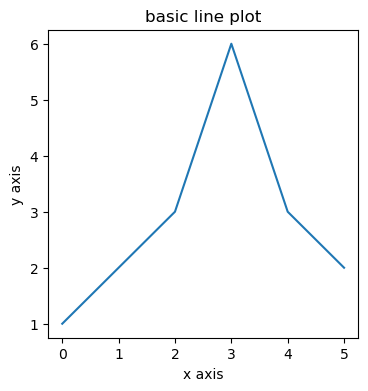

In [3]:
# basic line plot
myarray = np.array([1,2,3])
plt.plot(myarray)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('basic line plot')
plt.show()

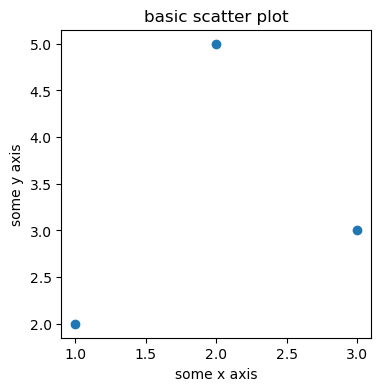

In [4]:
# basic scatter plot
x = np.array([1, 2, 3])
y = np.array([2, 5, 3])
plt.scatter(x,y)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.title('basic scatter plot')
plt.show()

## 1. Histogram
Purpose: Showing the distribution of a numerical variable

In [5]:
# Example data: Drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [6]:
drinks.head(5)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [7]:
# sort the bee r column and mentally split it into 3 groups
# drinks.beer.order().values
# drinks['beer'].sort_values().values
drinks.beer.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

In [9]:
type(drinks.beer)

pandas.core.series.Series

<Axes: ylabel='Frequency'>

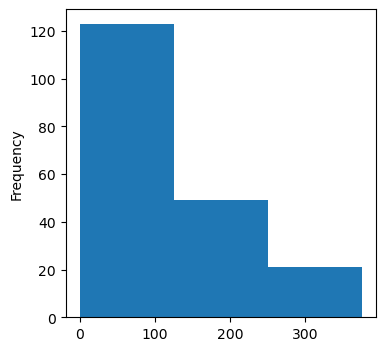

In [10]:
# compare with histogram
drinks.beer.plot(kind='hist', bins=3)

Text(0.5, 1.0, 'Histogram of Beer Servings')

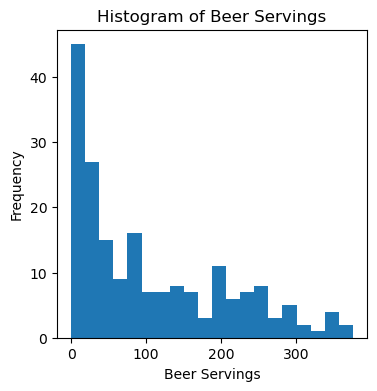

In [11]:
# try more bins
# add title and labels
drinks.beer.plot(kind='hist', bins=20)
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.title('Histogram of Beer Servings')

In [12]:
# # compare with density plot (smooth version of a histogram)
# drinks.beer.plot(kind='density', xlim=(0, 500))

array([[<Axes: title={'center': 'AF'}>, <Axes: title={'center': 'AS'}>],
       [<Axes: title={'center': 'EU'}>, <Axes: title={'center': 'NA'}>],
       [<Axes: title={'center': 'OC'}>, <Axes: title={'center': 'SA'}>]],
      dtype=object)

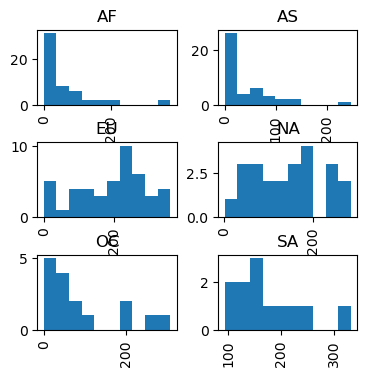

In [12]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

array([[<Axes: title={'center': 'AF'}>, <Axes: title={'center': 'AS'}>],
       [<Axes: title={'center': 'EU'}>, <Axes: title={'center': 'NA'}>],
       [<Axes: title={'center': 'OC'}>, <Axes: title={'center': 'SA'}>]],
      dtype=object)

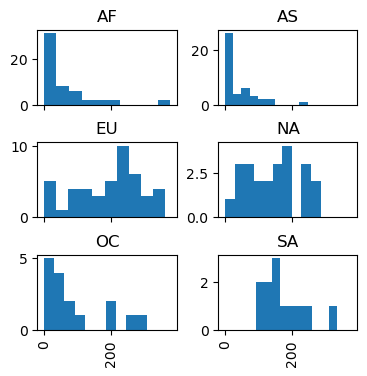

In [13]:
# share the x axes
drinks.hist(column='beer', by='continent', sharex=True)

array([[<Axes: title={'center': 'AF'}>, <Axes: title={'center': 'AS'}>],
       [<Axes: title={'center': 'EU'}>, <Axes: title={'center': 'NA'}>],
       [<Axes: title={'center': 'OC'}>, <Axes: title={'center': 'SA'}>]],
      dtype=object)

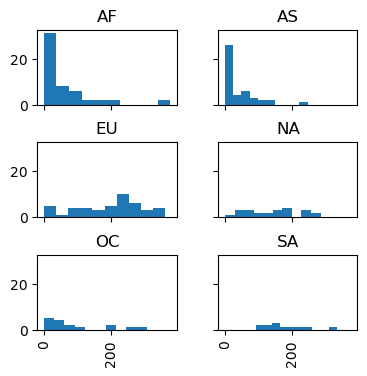

In [14]:
# share the x and y axes
drinks.hist(column='beer', by='continent', sharex=True, sharey=True)

array([[<Axes: title={'center': 'AF'}>, <Axes: title={'center': 'AS'}>,
        <Axes: title={'center': 'EU'}>],
       [<Axes: title={'center': 'NA'}>, <Axes: title={'center': 'OC'}>,
        <Axes: title={'center': 'SA'}>]], dtype=object)

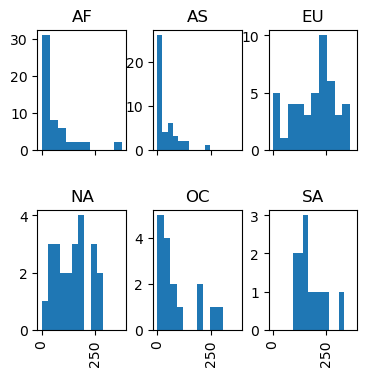

In [15]:
# change the layout
drinks.hist(column='beer', by='continent', sharex=True, layout=(2, 3))

## 2. Scatter plot
Purpose: Showing the relationship between two numerical variables

In [16]:
# select the beer and wine columns and sort by beer
# drinks[['beer', 'wine']].sort('beer').values
drinks[['beer', 'wine']].sort_values(by='beer').values

array([[  0,   0],
       [  0,  74],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  1,   7],
       [  1,   1],
       [  1,   4],
       [  1,   1],
       [  2,   0],
       [  3,   1],
       [  5,   0],
       [  5,   0],
       [  5,  16],
       [  5,   1],
       [  5,   0],
       [  6,   1],
       [  6,   0],
       [  6,   1],
       [  6,   9],
       [  8,   0],
       [  8,   1],
       [  8,   1],
       [  9,   2],
       [  9,   0],
       [  9,   7],
       [  9,   0],
       [ 12,  10],
       [ 13,   0],
       [ 15,   3],
       [ 15,   1],
       [ 16,   5],
       [ 16,   0],
       [ 17,   1],
       [ 18,   0],
       [ 19,  32],
       [ 19,   2],
       [ 20,   0],
       [ 20,  31],
       [ 21,  11],
       [ 21,  11],
       [ 21,   5],
       [ 21,

<Axes: xlabel='beer', ylabel='wine'>

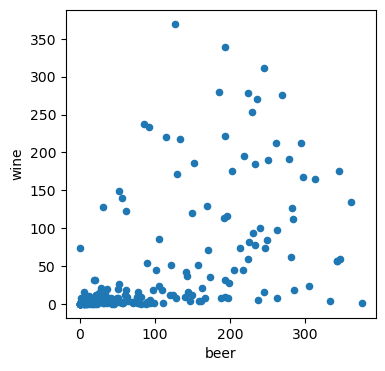

In [17]:
# compare with scatter plot
drinks.plot(kind='scatter', x='beer', y='wine')

<Axes: xlabel='beer', ylabel='wine'>

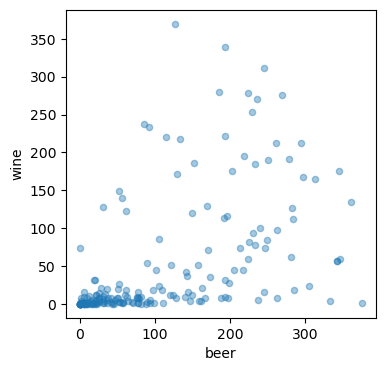

In [18]:
# add transparency
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.4)

<Axes: xlabel='beer', ylabel='wine'>

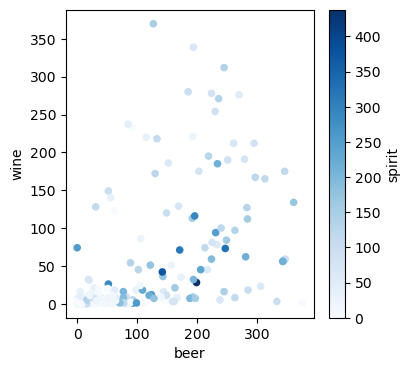

In [19]:
# vary point color by spirit servings
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues')

array([[<Axes: xlabel='beer', ylabel='beer'>,
        <Axes: xlabel='spirit', ylabel='beer'>,
        <Axes: xlabel='wine', ylabel='beer'>],
       [<Axes: xlabel='beer', ylabel='spirit'>,
        <Axes: xlabel='spirit', ylabel='spirit'>,
        <Axes: xlabel='wine', ylabel='spirit'>],
       [<Axes: xlabel='beer', ylabel='wine'>,
        <Axes: xlabel='spirit', ylabel='wine'>,
        <Axes: xlabel='wine', ylabel='wine'>]], dtype=object)

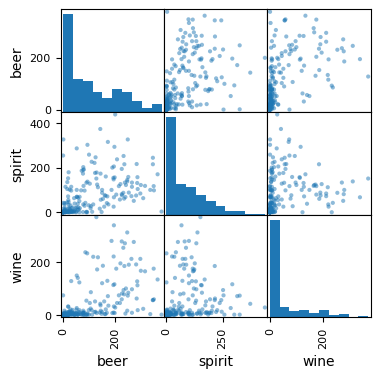

In [20]:
# scatter matrix of three numerical columns
# pd.scatter_matrix(drinks[['beer', 'spirit', 'wine']])
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']])

array([[<Axes: xlabel='beer', ylabel='beer'>,
        <Axes: xlabel='spirit', ylabel='beer'>,
        <Axes: xlabel='wine', ylabel='beer'>],
       [<Axes: xlabel='beer', ylabel='spirit'>,
        <Axes: xlabel='spirit', ylabel='spirit'>,
        <Axes: xlabel='wine', ylabel='spirit'>],
       [<Axes: xlabel='beer', ylabel='wine'>,
        <Axes: xlabel='spirit', ylabel='wine'>,
        <Axes: xlabel='wine', ylabel='wine'>]], dtype=object)

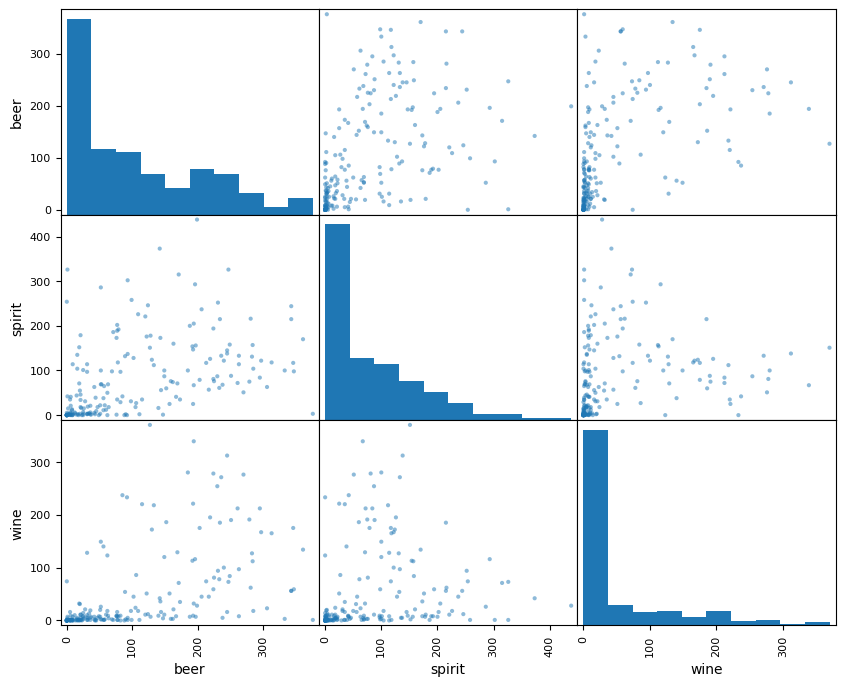

In [21]:
# increase figure size
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8))

## 3. Bar plot
Purpose: Showing a numerical comparison across different categories

In [21]:
# count the number of countries in each continent
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

<Axes: >

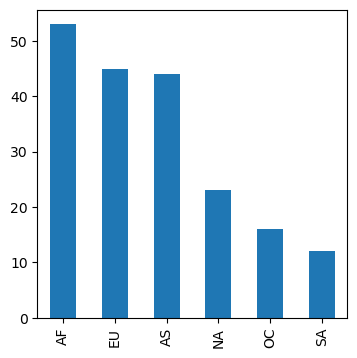

In [22]:
# compare with bar plot
drinks.continent.value_counts().plot(kind='bar')

In [23]:
# calculate the mean alcohol amounts for each continent
#drinks.groupby('continent').mean()
drinks.groupby('continent').mean(numeric_only=True)

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


<Axes: xlabel='continent'>

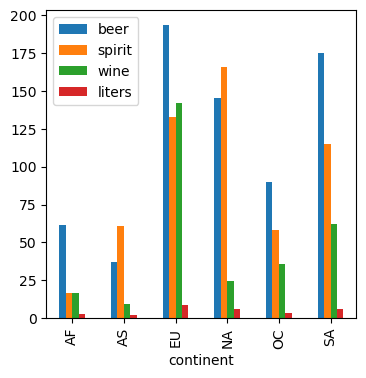

In [24]:
# side-by-side bar plots
drinks.groupby('continent').mean(numeric_only=True).plot(kind='bar')

<Axes: xlabel='continent'>

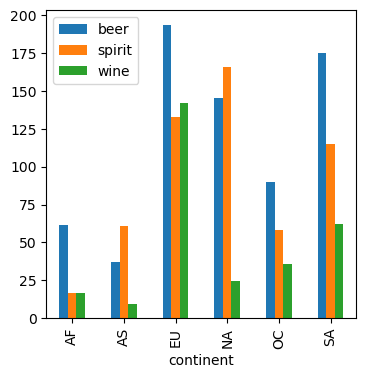

In [25]:
# drop the liters column
drinks.groupby('continent').mean(numeric_only=True).drop('liters', axis=1).plot(kind='bar')

<Axes: xlabel='continent'>

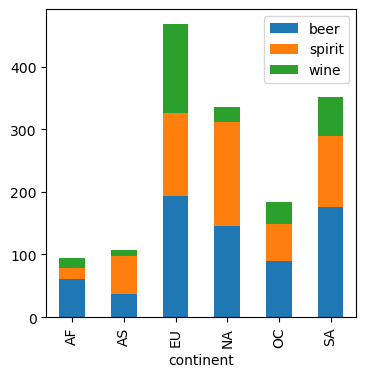

In [26]:
# stacked bar plots
drinks.groupby('continent').mean(numeric_only=True).drop('liters', axis=1).plot(kind='bar', stacked=True)

## 4. Box plot
Purpose: Showing quartiles and outliers for one or more numerical variables

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(More useful than mean and standard deviation for describing skewed distributions)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

In [27]:
# sort the spirit column
# drinks.spirit.order().values
drinks.sort_values(by='spirit').values

array([['Afghanistan', 0, 0, 0, 0.0, 'AS'],
       ['Burundi', 88, 0, 0, 6.3, 'AF'],
       ['Pakistan', 0, 0, 0, 0.0, 'AS'],
       ...,
       ['Russian Federation', 247, 326, 73, 11.5, 'AS'],
       ['Belarus', 142, 373, 42, 14.4, 'EU'],
       ['Grenada', 199, 438, 28, 11.9, 'NA']], dtype=object)

In [28]:
# show "five-number summary" for spirit
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

<Axes: >

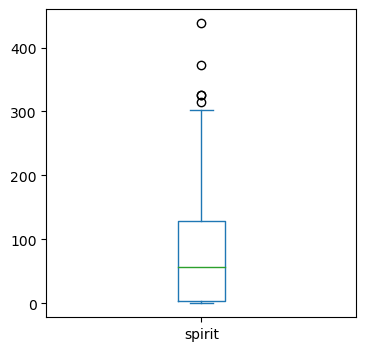

In [30]:
# compare with box plot
drinks.spirit.plot(kind='box')

<Axes: >

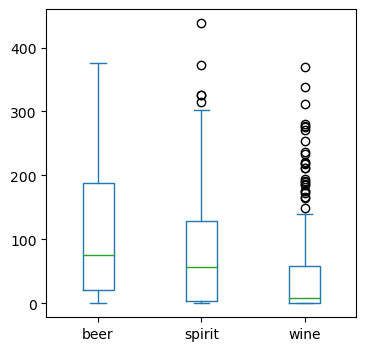

In [31]:
# include multiple variables
drinks.drop('liters', axis=1).plot(kind='box')

<Axes: >

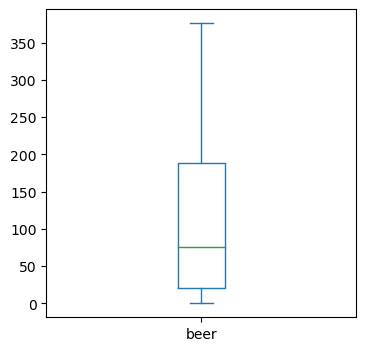

In [32]:
# reminder: box plot of beer servings
drinks.beer.plot(kind='box')

<Axes: title={'center': 'beer'}, xlabel='continent'>

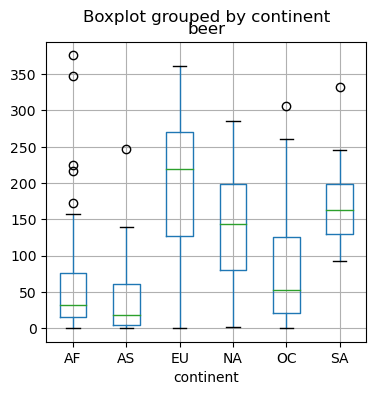

In [34]:
# box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent')

array([[<Axes: title={'center': 'beer'}, xlabel='[continent]'>,
        <Axes: title={'center': 'liters'}, xlabel='[continent]'>],
       [<Axes: title={'center': 'spirit'}, xlabel='[continent]'>,
        <Axes: title={'center': 'wine'}, xlabel='[continent]'>]],
      dtype=object)

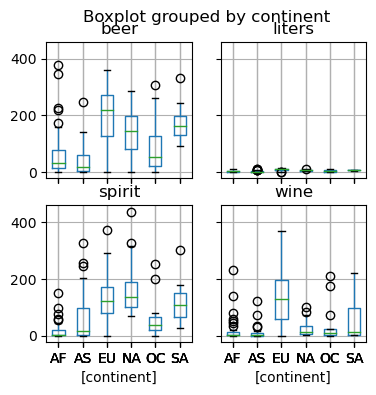

In [35]:
# box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent')

## 5. Line plot
Purpose: Showing the trend of a numerical variable over time

In [36]:
# read in the ufo data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [37]:
# count the number of ufo reports each year (and sort by year)
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

<Axes: >

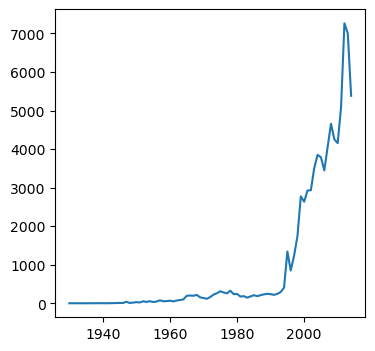

In [38]:
# compare with line plot
ufo.Year.value_counts().sort_index().plot()

<Axes: >

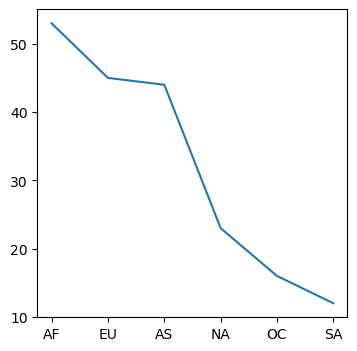

In [39]:
# don't use a line plot when there is no logical ordering
drinks.continent.value_counts().plot()

## 6. Saving a plot and Changing a style

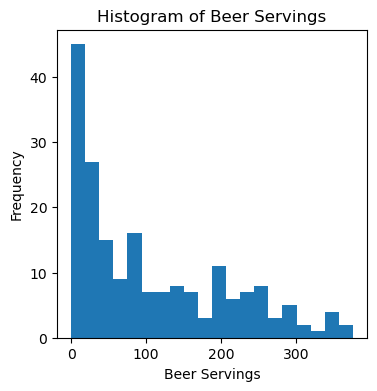

In [40]:
# saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram_original.png')

In [41]:
# list available plot styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [42]:
# change to a different style
plt.style.use('ggplot')

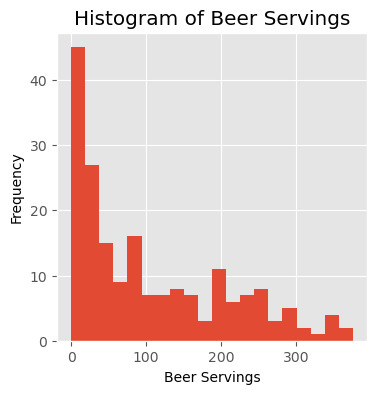

In [43]:
# saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram_ggplot.png')

C:\Users\namgy\AppData\Local\Temp\ipykernel_33328\3014778231.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


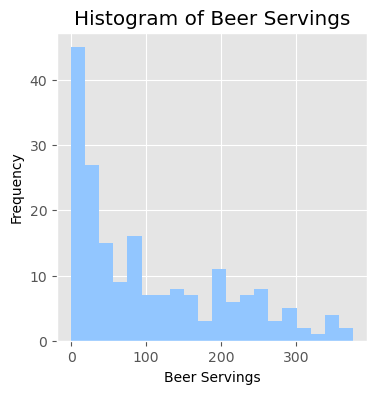

In [44]:
# Other example
plt.style.use('seaborn-pastel')
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram_seaborn.png')

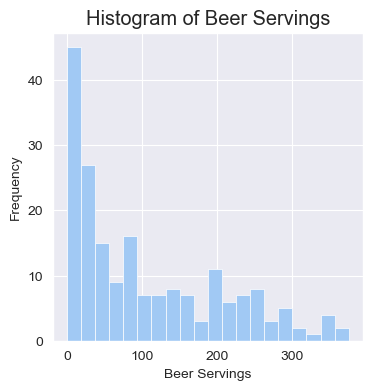

In [45]:
!pip install seaborn
import seaborn as sns

sns.set_style('darkgrid')  # You can change this to any of the available styles mentioned above
sns.set_palette('pastel')

drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.show()

# 7. Style

**Marker**:
- http://matplotlib.org/1.5.1/examples/lines_bars_and_markers/marker_reference.html
- http://matplotlib.org/api/markers_api.html

**Line**:
- http://matplotlib.org/1.5.1/examples/lines_bars_and_markers/line_styles_reference.html
- http://matplotlib.org/api/lines_api.html

**Color**:
- http://matplotlib.org/examples/color/named_colors.html
- http://matplotlib.org/api/colors_api.html


In [56]:
from IPython.display import Image

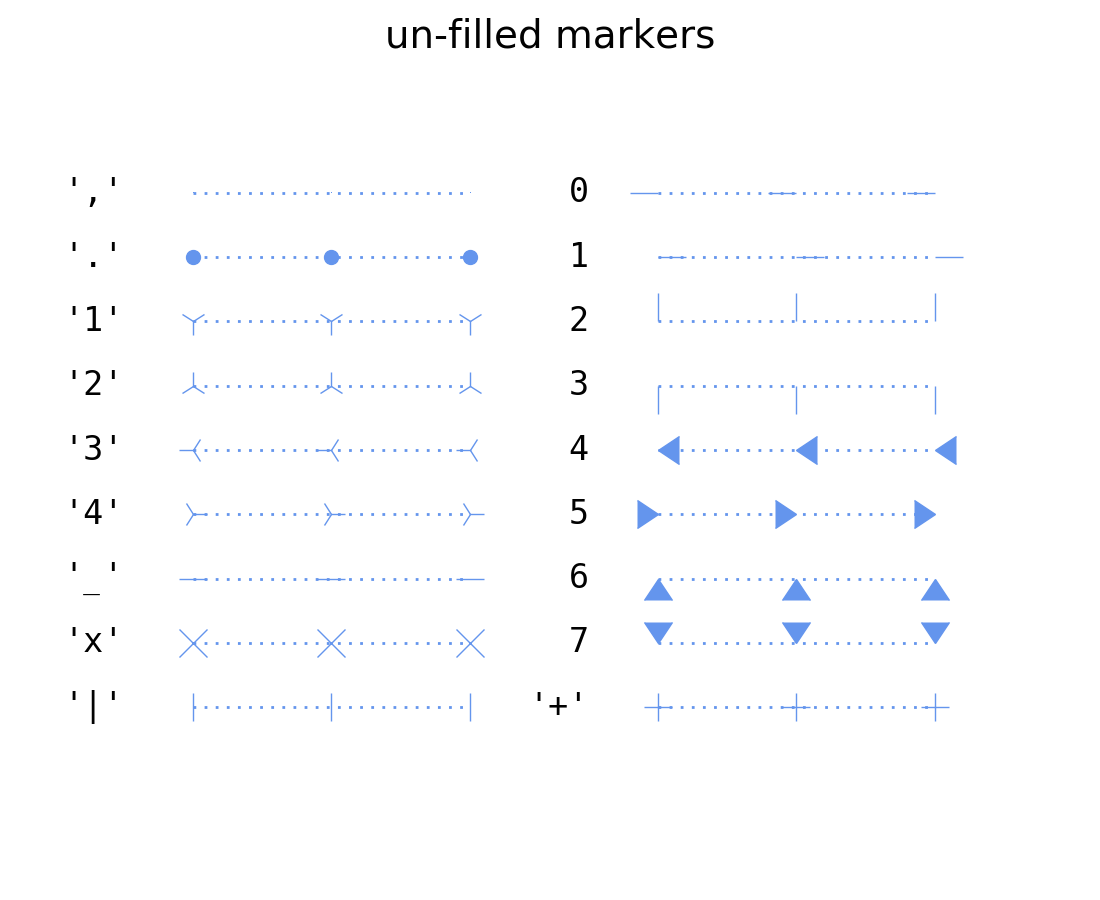

In [57]:
Image(filename="marker_reference_00.png")

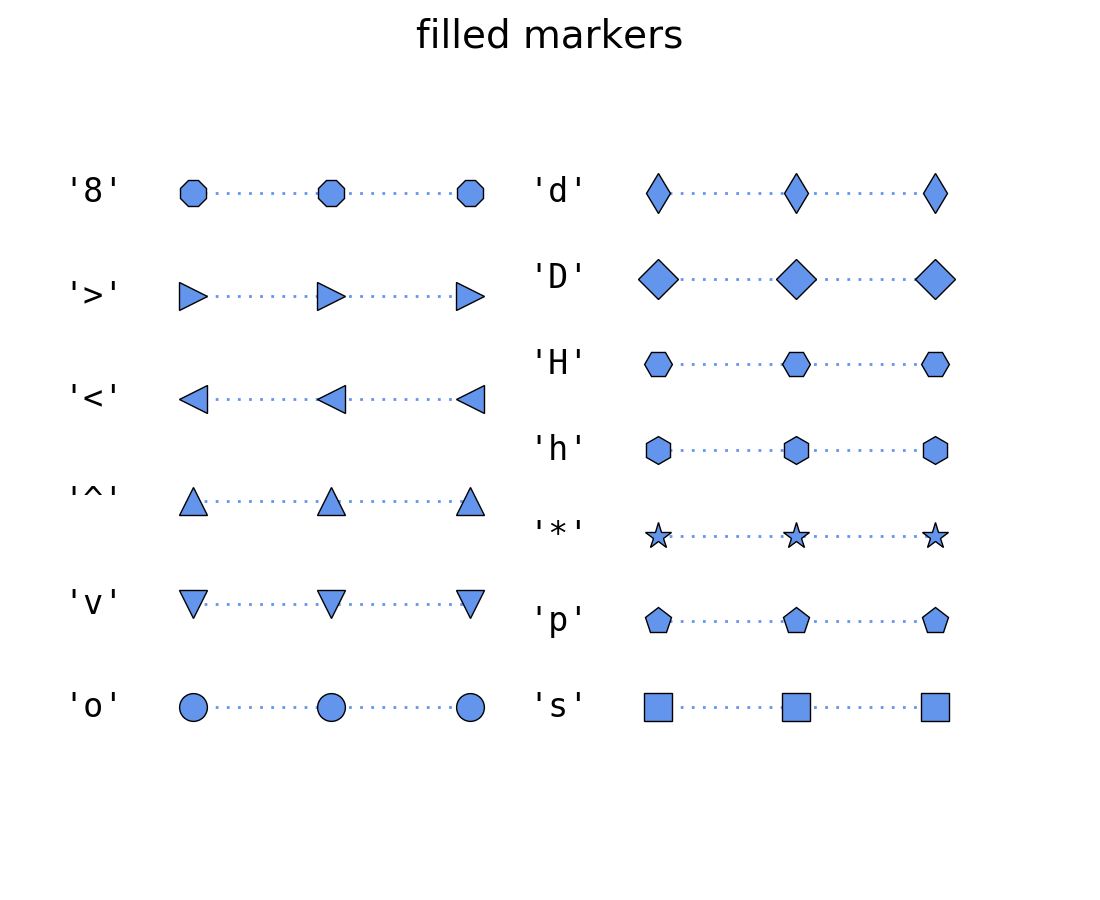

In [58]:
Image(filename="marker_reference_01.png")

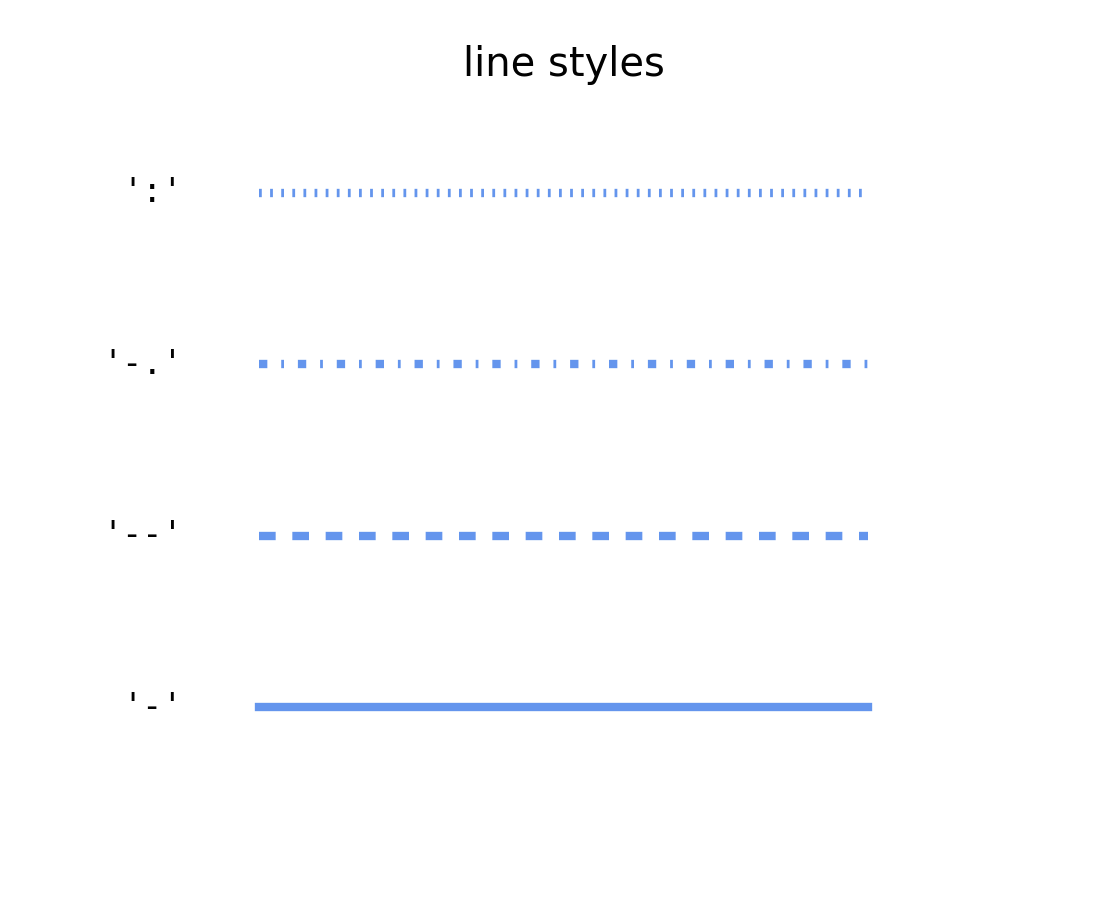

In [59]:
Image(filename="line_styles_reference.png")

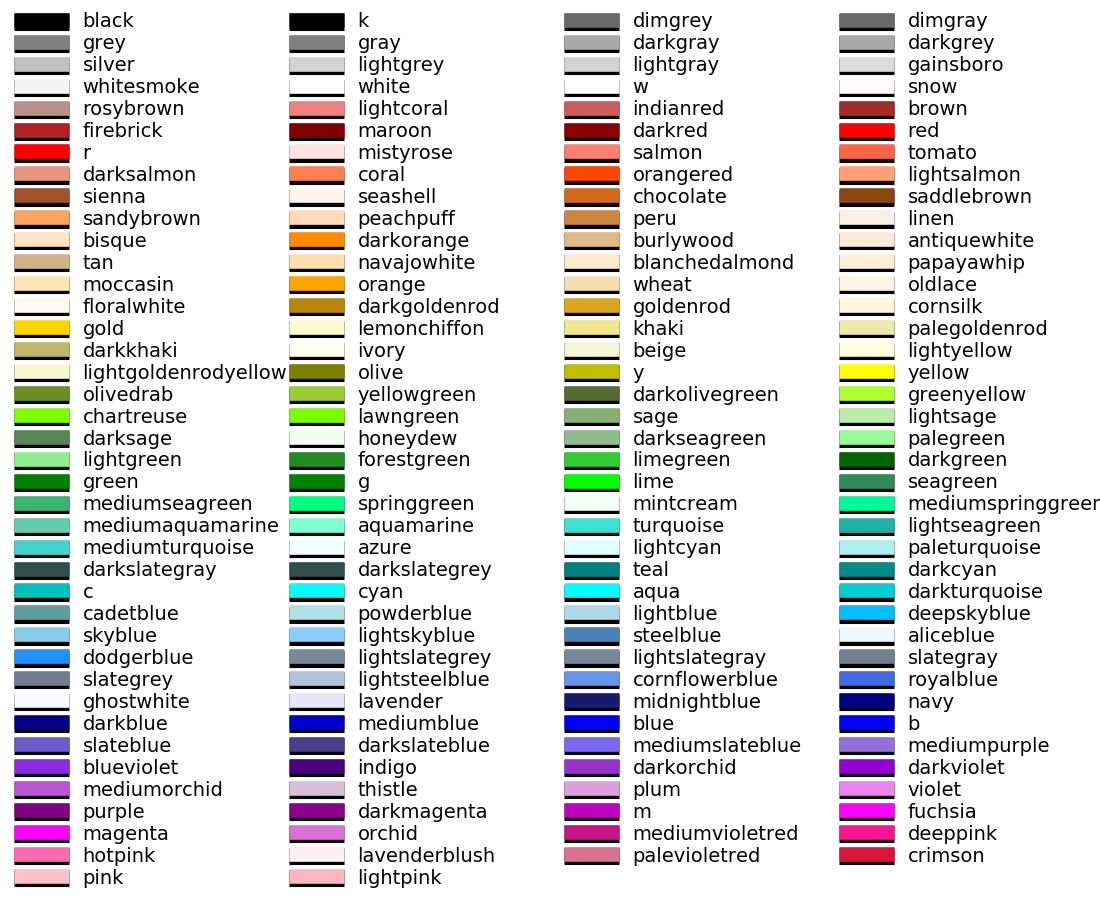

In [60]:
Image(filename="named_colors.png")

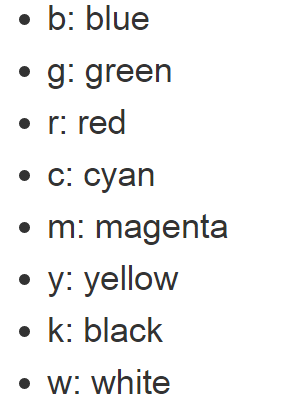

In [61]:
Image(filename="named_colors_brief.png")

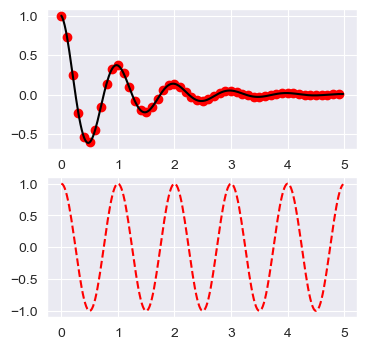

In [62]:
# from http://matplotlib.org/users/pyplot_tutorial.html
# 자유롭게 변형해보면서 그림을 수정해보시오.

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'ro', t2, f(t2), 'k') # 'ro': 빨간색 동그라미, 'k': 검은색

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--') # 'r--': 빨간색 점선
plt.show()